# 2020 & 2021 Istanbul Grand Prix Statistics

The Formula 1 dataset contains data on F1 races and racers from the opening year of 1950 to the present day. This dataset contains various <code>.csv</code> files. Each of these files contains various insights related to different topics.

The main topic to be examined in this notebook is the Turkish Grand Prix held in Istanbul in 2021. Various examinations will be made here and some assumptions will be tried to be derived from the data.

Firstly start with required <code>imports</code>.

In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

print('Imports are successful!')

Imports are successful!


## Exploratory Data Analysis - EDA

Variables will be created within the EDA research of this project, and some information based on these variables will be highlighted. Let's start examining the data.

In [2]:
df_results = pd.read_csv('results.csv')
df_names = pd.read_csv('drivers.csv')
df_races = pd.read_csv('races.csv')
df_circuits = pd.read_csv('circuits.csv')
df_pit_stops = pd.read_csv('pit_stops.csv')

print('Variables created successfully!')

Variables created successfully!


In [3]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26519 non-null  int64  
 1   raceId           26519 non-null  int64  
 2   driverId         26519 non-null  int64  
 3   constructorId    26519 non-null  int64  
 4   number           26519 non-null  object 
 5   grid             26519 non-null  int64  
 6   position         26519 non-null  object 
 7   positionText     26519 non-null  object 
 8   positionOrder    26519 non-null  int64  
 9   points           26519 non-null  float64
 10  laps             26519 non-null  int64  
 11  time             26519 non-null  object 
 12  milliseconds     26519 non-null  object 
 13  fastestLap       26519 non-null  object 
 14  rank             26519 non-null  object 
 15  fastestLapTime   26519 non-null  object 
 16  fastestLapSpeed  26519 non-null  object 
 17  statusId    

In [4]:
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     859 non-null    int64 
 1   driverRef    859 non-null    object
 2   number       859 non-null    object
 3   code         859 non-null    object
 4   forename     859 non-null    object
 5   surname      859 non-null    object
 6   dob          859 non-null    object
 7   nationality  859 non-null    object
 8   url          859 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.5+ KB


In [5]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


In [6]:
df_circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


In [7]:
df_pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10990 entries, 0 to 10989
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10990 non-null  int64 
 1   driverId      10990 non-null  int64 
 2   stop          10990 non-null  int64 
 3   lap           10990 non-null  int64 
 4   time          10990 non-null  object
 5   duration      10990 non-null  object
 6   milliseconds  10990 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 601.1+ KB


The EDA was like this. In later processes, operations related to the columns here will be performed as needed. For now, let's move on.

## Data Visualization

We created variables and searched about their columns so far. Now it's time to examine the Grand Prix map. On this <code>Folium</code> map we will see all the Grand Prix that have been held so far. The map is as follows, with Istanbul in orange and all the remaining Grand Prix in red.

In [8]:
# data visualization with on the world map
df_circuits_other = df_circuits[df_circuits['circuitRef']!='istanbul']
df_circuit_istanbul = df_circuits[df_circuits['circuitRef']=='istanbul']

circuit_map = folium.Map(location=(29.840923, 24.036644), zoom_start=2)

for index, row in df_circuits_other.iterrows():
    folium.Marker(location=[row['lat'], row['lng']],
                  popup=row['location'] + ' Grand Prix',
                  icon=folium.Icon(icon='flag', color='red')
                 ).add_to(circuit_map)

for index, row in df_circuit_istanbul.iterrows():
    folium.Marker(location=[row['lat'], row['lng']],
                  popup=row['location'] + ' Grand Prix',
                  icon=folium.Icon(icon='flag', color='orange')
                 ).add_to(circuit_map)

circuit_map

We learned Grand Prix locations so far. We will continue to analyze the data.

Right now, we will see ranking of the <code>2020 Turkish Grand Prix</code> -also you can see its bar chart below the table. 

In [9]:
# data preprocessing before the ranking data visualization
istanbul_prix_racers_2020 = ['albon', 'bottas', 'max_verstappen', 'perez',
                        'leclerc', 'hamilton', 'gasly', 'giovinazzi',
                        'ocon', 'raikkonen', 'ricciardo', 'kevin_magnussen',
                        'russell', 'kvyat', 'latifi', 'vettel',
                        'grosjean', 'stroll', 'sainz', 'norris']

df_names_2020 = df_names[df_names['driverRef'].isin(istanbul_prix_racers_2020)]
df_names_2020['driverRef'].unique()

merged_df_results = pd.merge(df_names_2020, df_results, on='driverId')
df_races_2020 = df_races[(df_races['name']=='Turkish Grand Prix') & (df_races['date'].str[:4]=='2020')]
merged_df_results = pd.merge(merged_df_results, df_races_2020, on='raceId')

finished_races_2020 = merged_df_results # if searching for point-winners, uncomment [(merged_df_results['statusId'] == 1)]

finished_races_2020[['driverRef', 'position']].head(30)
finished_races_2020.loc[3, 'position'] = '18'
finished_races_2020.loc[14, 'position'] = '20'
finished_races_2020.loc[19, 'position'] = '19'

finished_races_2020['position'] = finished_races_2020['position'].astype(int)
average_positions_2020 = finished_races_2020.groupby('driverRef')['position'].sum()
average_positions_2020 = average_positions_2020.sort_values(ascending=True)

average_positions_2020.head()

driverRef
hamilton    1
perez       2
vettel      3
leclerc     4
sainz       5
Name: position, dtype: int64

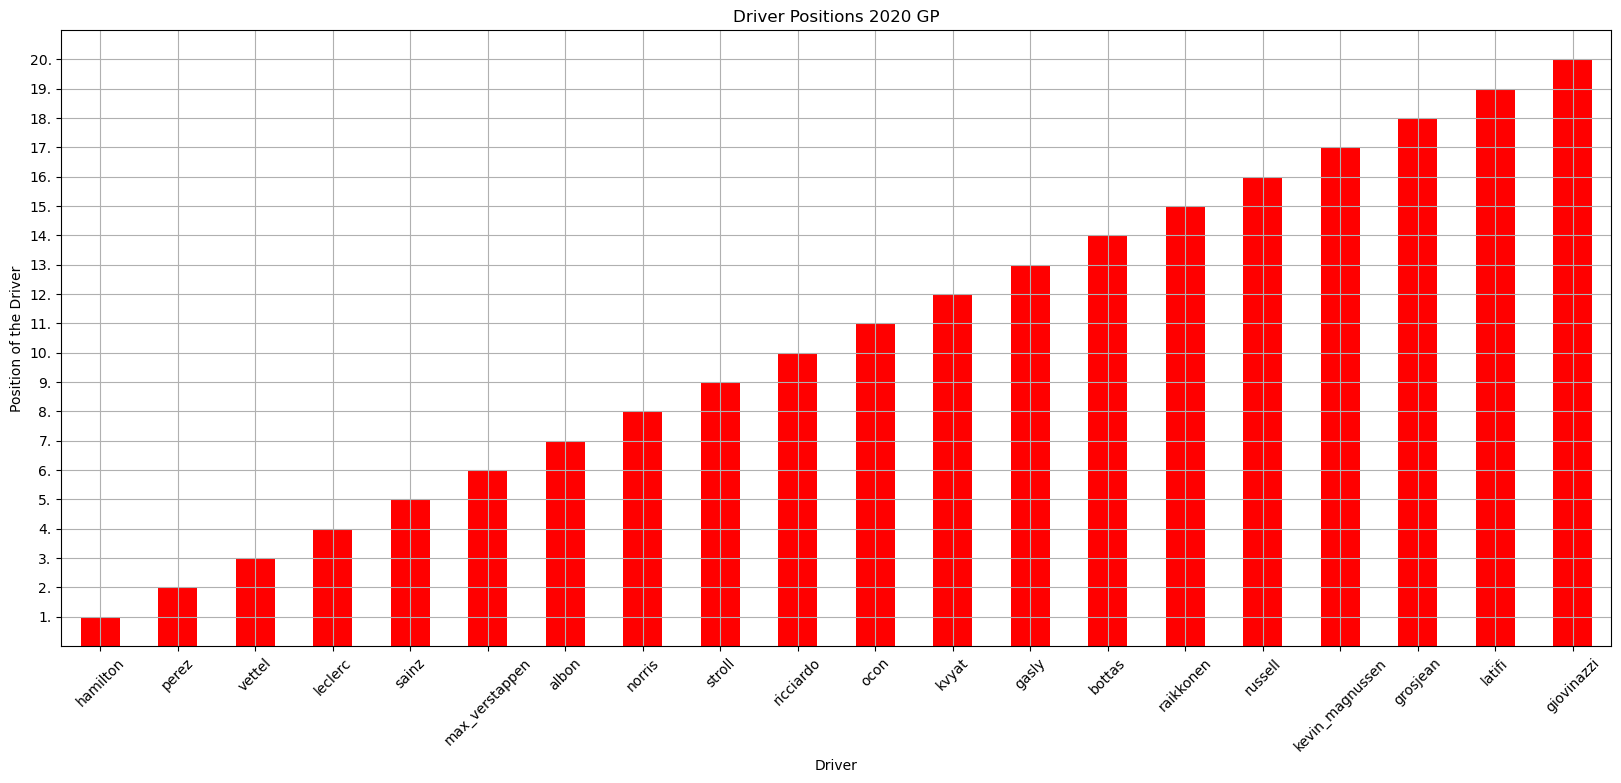

In [10]:
# graph
plt.figure(figsize=(20, 8))
average_positions_2020.plot(kind='bar', x='driverRef', y='position', title='Driver Positions 2020 GP', color='red')
plt.xlabel('Driver')
plt.ylabel('Position of the Driver')
plt.yticks(range(1, 21), [str(i)+'.' for i in range(1, 21)])
plt.xticks(rotation=45)
plt.grid()
plt.show()

In 2020, winner of the race is again <code>Mercedes-Benz</code>, with <code>Hamilton</code>. We can say <code>Mercedes</code> loves Istanbul.

Now we will see the chart of 2021 GP.

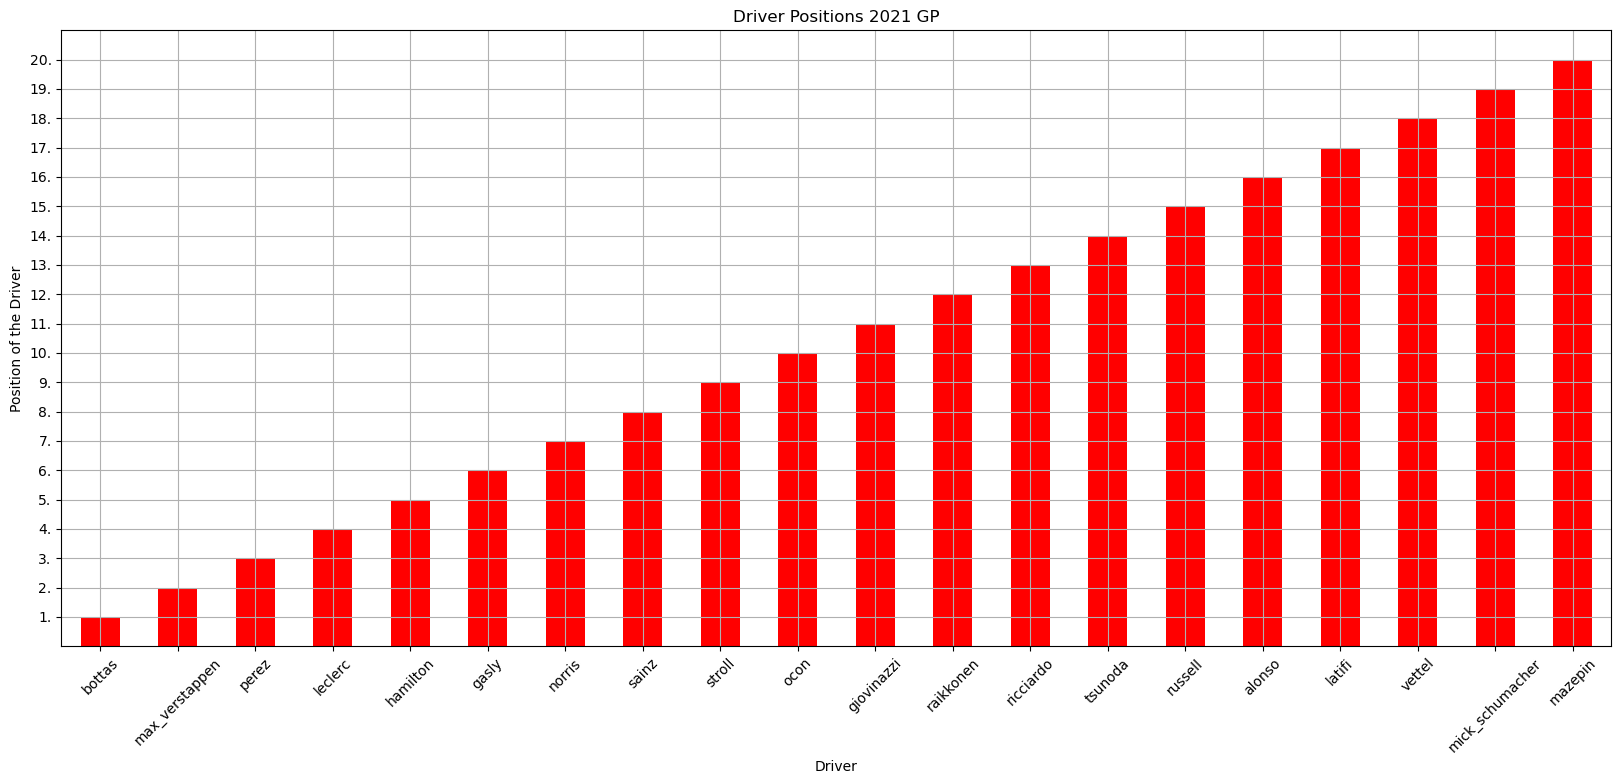

In [11]:
# data preprocessing before the ranking data visualization
istanbul_prix_racers_2021 = ['mick_schumacher', 'bottas', 'max_verstappen', 'perez',
                        'leclerc', 'hamilton', 'gasly', 'giovinazzi',
                        'ocon', 'raikkonen', 'ricciardo', 'tsunoda',
                        'russell', 'alonso', 'latifi', 'vettel',
                        'mazepin', 'stroll', 'sainz', 'norris']

df_names_2021 = df_names[df_names['driverRef'].isin(istanbul_prix_racers_2021)]
df_names_2021['driverRef'].unique()

merged_df_results = pd.merge(df_names_2021, df_results, on='driverId')
df_races_2021 = df_races[(df_races['name']=='Turkish Grand Prix') & (df_races['date'].str[:4]=='2021')]
merged_df_results = pd.merge(merged_df_results, df_races_2021, on='raceId')

finished_races_2021 = merged_df_results # if searching for point-winners, uncomment [(merged_df_results['statusId'] == 1)]

finished_races_2021['position'] = finished_races_2021['position'].astype(int)
average_positions_2021 = finished_races_2021.groupby('driverRef')['position'].sum()
average_positions_2021 = average_positions_2021.sort_values(ascending=True)

# graph

plt.figure(figsize=(20, 8))
average_positions_2021.plot(kind='bar', x='driverRef', y='position', title='Driver Positions 2021 GP', color='red')
plt.xlabel('Driver')
plt.ylabel('Position of the Driver')
plt.yticks(range(1, 21), [str(i)+'.' for i in range(1, 21)])
plt.xticks(rotation=45)
plt.grid()
plt.show()

As you can see in the chart, the winner of this race is <code>Valtteri Bottas</code>. <code>Bottas</code> also races for <code>Mercedes-Benz</code> as a teammate of <code>Lewis Hamilton</code>.

After seeing its rankings, we will delve into pit stops right now. Start with 2020 GP.

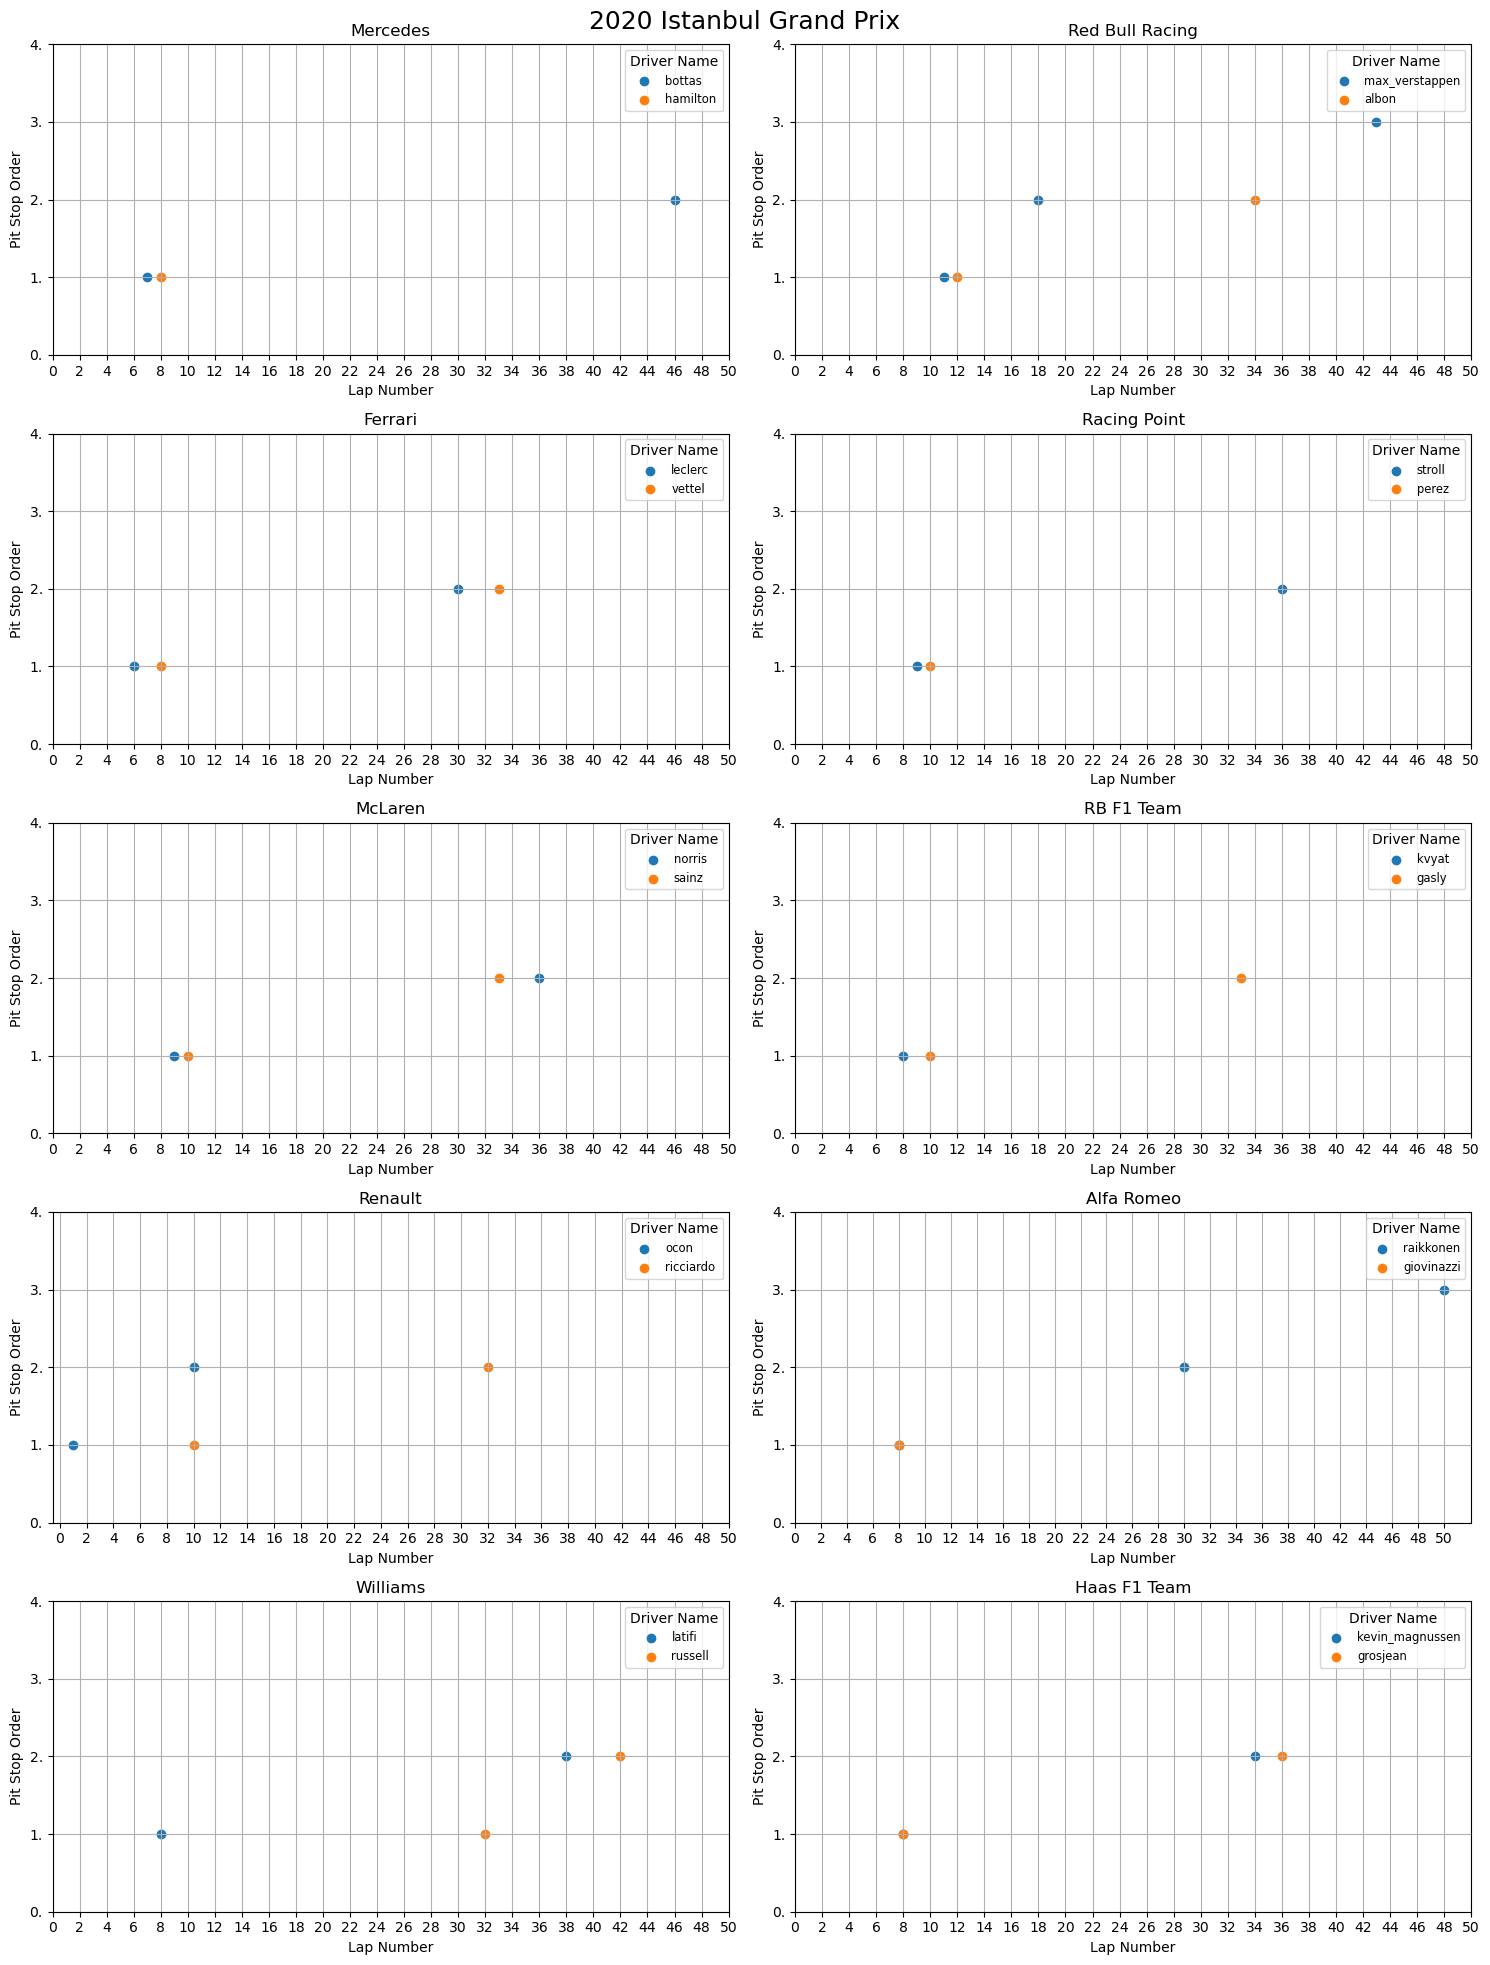

In [12]:
# pit stops number of pilots -with brands
df_pit_stops_istanbul_2020 = df_pit_stops[df_pit_stops['raceId']==1044]

brands_racers_2020 = {
    'Mercedes': [822, 1],
    'Red Bull Racing': [830, 848],
    'Ferrari': [844, 20],
    'Racing Point': [815, 840],
    'McLaren': [846, 832],
    'RB F1 Team': [826, 842],
    'Renault': [839, 817],
    'Alfa Romeo': [841, 8],
    'Williams': [847, 849],
    'Haas F1 Team': [154, 825]
}
brands_racers_2020 = pd.DataFrame(brands_racers_2020).T
brands_racers_2020.reset_index(inplace=True)
brands_racers_2020.columns = ['brand', 'driver1', 'driver2']

brands_racers_long = pd.melt(brands_racers_2020, id_vars='brand', value_vars=['driver1', 'driver2'], value_name='driverId')
merged_df_2020 = pd.merge(df_pit_stops_istanbul_2020, brands_racers_long, on='driverId', how='left')

pit_stop_counts_2020 = merged_df_2020.groupby('driverId')['lap'].count()

merged_df_2020 = pd.merge(merged_df_2020, pit_stop_counts_2020, on='driverId', how='left')
merged_df_2020 = pd.merge(merged_df_2020, df_names, on='driverId', how='left')

fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

plt.suptitle('2020 Istanbul Grand Prix', fontsize=18)

brands = ['Mercedes', 'Red Bull Racing', 'Ferrari', 'Racing Point', 'McLaren', 
          'RB F1 Team', 'Renault', 'Alfa Romeo', 'Williams', 'Haas F1 Team']
colors = ['red', 'orange', 'purple', 'black', 'yellow', 
          'green', 'darkblue', 'navy', 'gold', 'blue']

for i, brand in enumerate(brands):
    df_brand = merged_df_2020[merged_df_2020['brand'] == brand]
    ax = axs[i]
    
    for driver in df_brand['driverRef'].unique():
        df_driver = df_brand[df_brand['driverRef'] == driver]
        ax.scatter(df_driver['lap_x'], df_driver['stop'], 
                   label=driver, marker='o')
    
    ax.set_title(brand)
    ax.set_xlabel('Lap Number')
    ax.set_ylabel('Pit Stop Order')
    ax.set_yticks(range(0, 5), [str(i)+'.' for i in range(0,5)])
    ax.set_xticks(range(0, 52, 2))
    ax.grid()
    ax.legend(title='Driver Name', loc='best', fontsize='small')

plt.tight_layout()
plt.show()

As seen in the 2020 Istanbul GP, there is a clear difference compared to the number of pit stops in 2021. While the winner of the race, <code>Hamilton</code>, took 1 pit stop, we generally witness the remaining pilots taking more than 1 pit stop.

The pilot who needed the most pit stops took 2. Now, do the same thing for 2021 GP.

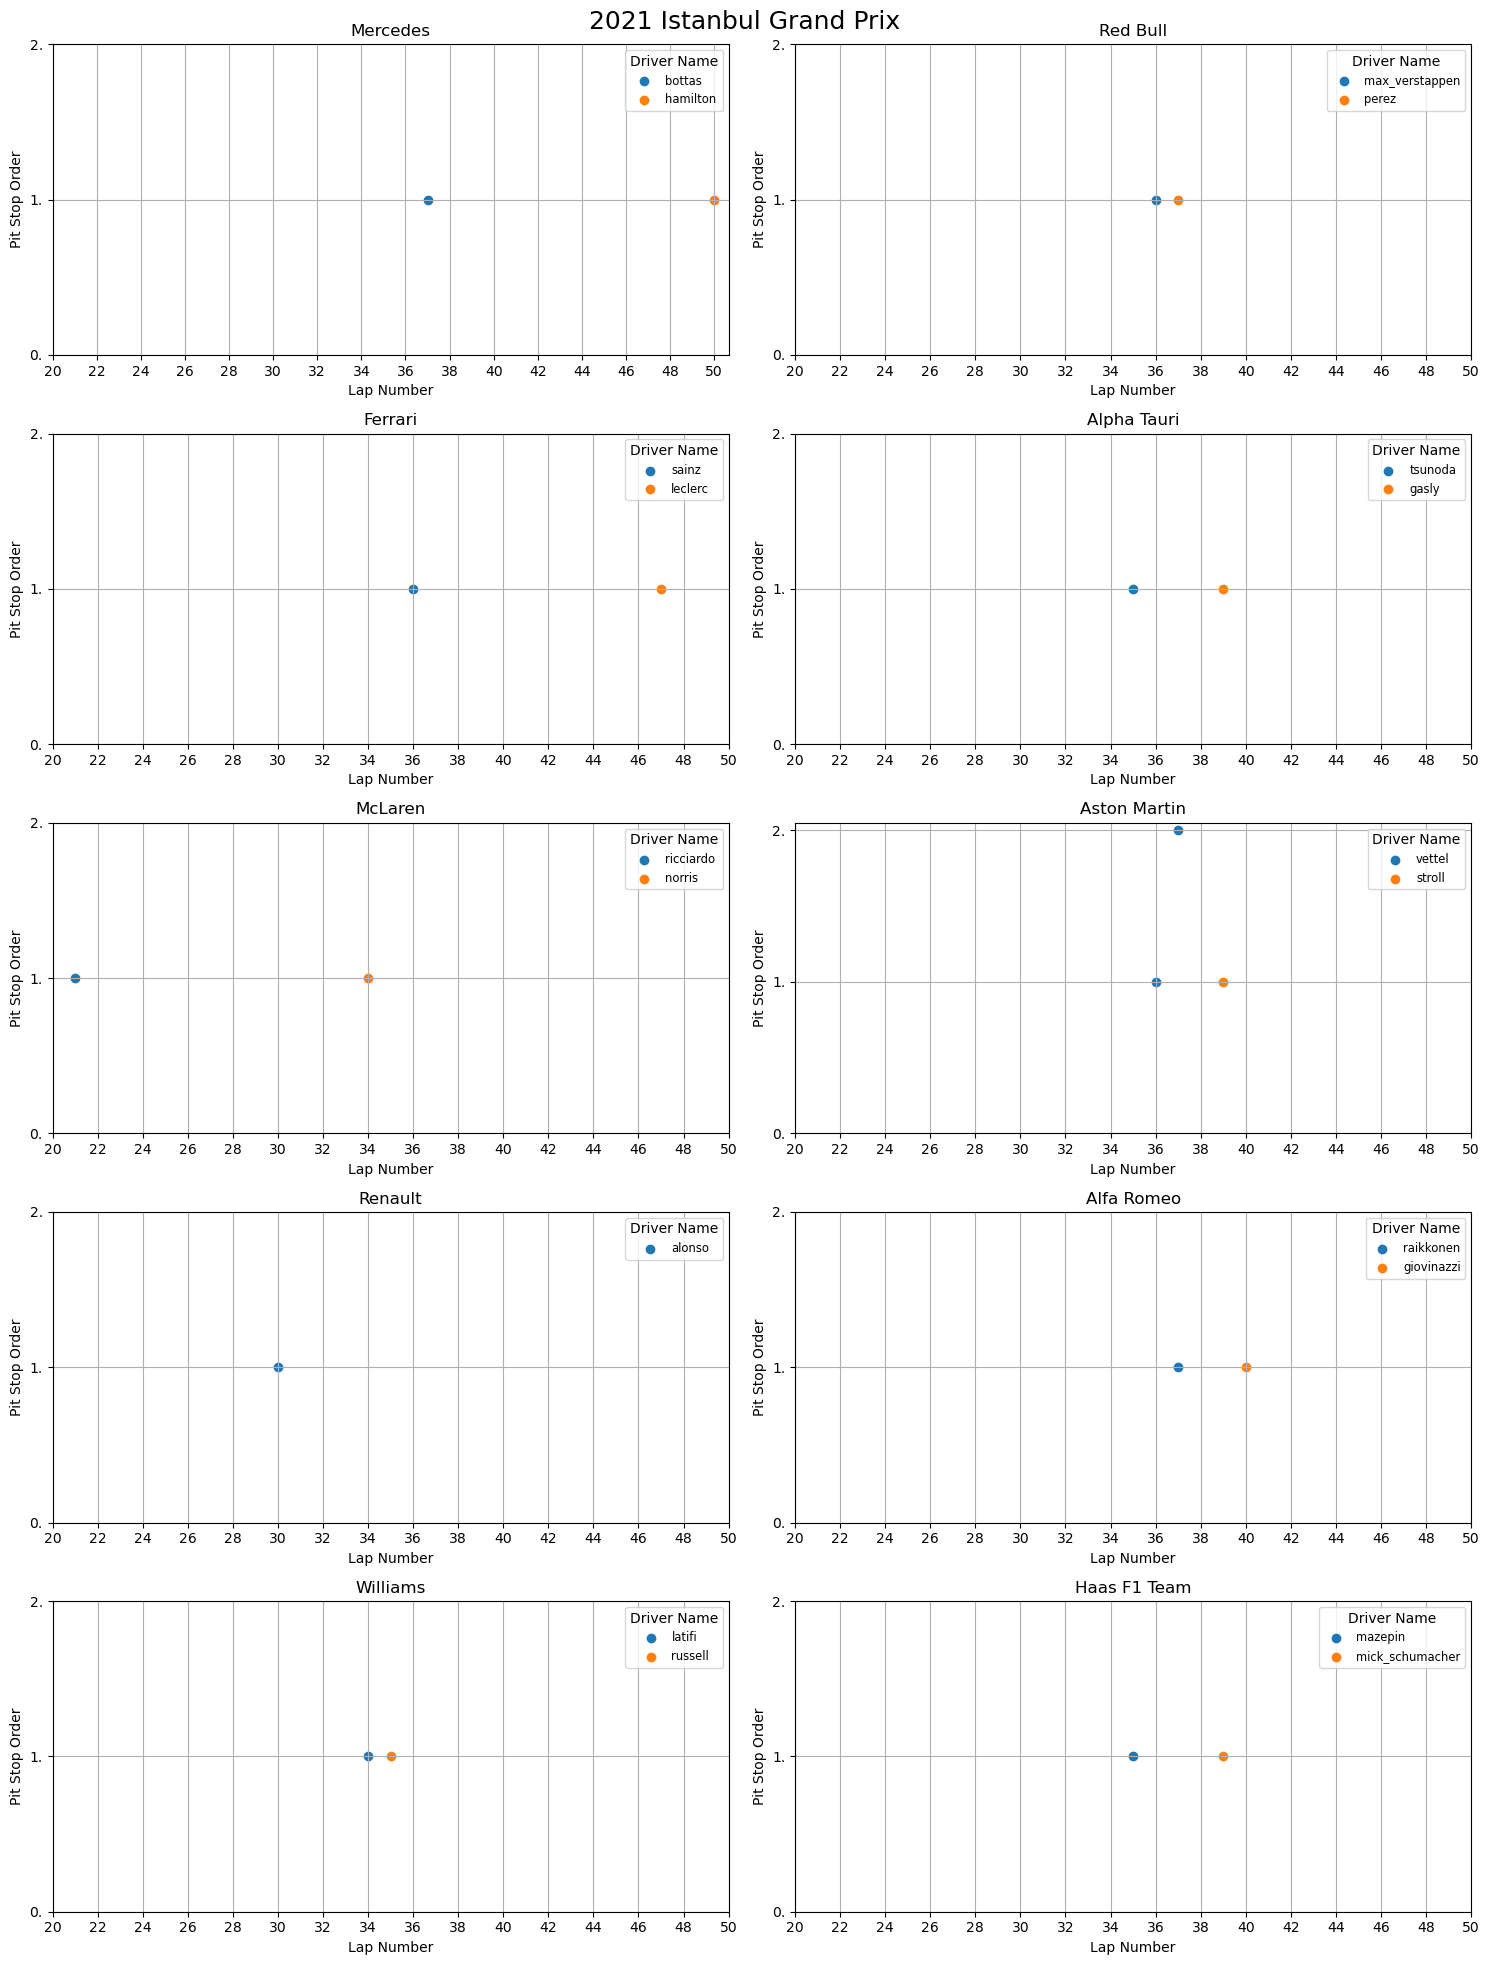

In [13]:
# pit stops number of pilots -with brands
df_pit_stops_istanbul_2021 = df_pit_stops[df_pit_stops['raceId']==1067]

brands_racers_2021 = {
    'Mercedes': [822, 1],
    'Red Bull': [830, 815],
    'Ferrari': [844, 832],
    'Alpha Tauri': [842, 852],
    'McLaren': [846, 817],
    'Aston Martin': [840, 20],
    'Renault': [839, 4],
    'Alfa Romeo': [841, 8],
    'Williams': [847, 849],
    'Haas F1 Team': [854, 853]
}
brands_racers_2021 = pd.DataFrame(brands_racers_2021).T
brands_racers_2021.reset_index(inplace=True)
brands_racers_2021.columns = ['brand', 'driver1', 'driver2']

brands_racers_long = pd.melt(brands_racers_2021, id_vars='brand', value_vars=['driver1', 'driver2'], value_name='driverId')
merged_df_2021 = pd.merge(df_pit_stops_istanbul_2021, brands_racers_long, on='driverId', how='left')

pit_stop_counts_2021 = merged_df_2021.groupby('driverId')['lap'].count()

merged_df_2021 = pd.merge(merged_df_2021, pit_stop_counts_2021, on='driverId', how='left')
merged_df_2021 = pd.merge(merged_df_2021, df_names, on='driverId', how='left')

fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

plt.suptitle('2021 Istanbul Grand Prix', fontsize=18)

brands = ['Mercedes', 'Red Bull', 'Ferrari', 'Alpha Tauri', 'McLaren', 
          'Aston Martin', 'Renault', 'Alfa Romeo', 'Williams', 'Haas F1 Team']
colors = ['red', 'orange', 'purple', 'black', 'yellow', 
          'green', 'darkblue', 'navy', 'gold', 'blue']

for i, brand in enumerate(brands):
    df_brand = merged_df_2021[merged_df_2021['brand'] == brand]
    ax = axs[i]
    
    for driver in df_brand['driverRef'].unique():
        df_driver = df_brand[df_brand['driverRef'] == driver]
        ax.scatter(df_driver['lap_x'], df_driver['stop'], 
                   label=driver, marker='o')
    
    ax.set_title(brand)
    ax.set_xlabel('Lap Number')
    ax.set_ylabel('Pit Stop Order')
    ax.set_yticks(range(0, 3), [str(i)+'.' for i in range(0,3)])
    ax.set_xticks(range(20, 52, 2))
    ax.grid()
    ax.legend(title='Driver Name', loc='best', fontsize='small')

plt.tight_layout()
plt.show()

As can be seen here, the drivers, with some exceptions, generally took pit stops between laps <code>30 and 40</code>. Winner of 2021 GP (Bottas) takes only one pit stop in 37th lap.

In general, there seems to be a clear difference in the number of pit stops. Let's examine this a little further.

The race id of the 2020 Istanbul GP was <code>1044</code>. Let's start our process from here.

In [14]:
df_2020_istanbul_pit_stops = df_pit_stops[(df_pit_stops['raceId']==1044)]
df_2021_istanbul_pit_stops = df_pit_stops[(df_pit_stops['raceId']==1067)]

print(f'''Number of pit stops in 2020 Istanbul GP: {df_2020_istanbul_pit_stops['stop'].sum()}
Number of pit stops in 2021 Istanbul GP: {df_2021_istanbul_pit_stops['stop'].sum()}''')

Number of pit stops in 2020 Istanbul GP: 58
Number of pit stops in 2021 Istanbul GP: 21


The drop from a serious number like 58 to a number like 21 shows that serious improvements have been made on the track. Now it will be calculated how many pit stops there are per driver (there are 20 drivers in total in an F1 race).

In [15]:
print(f'''Pit stop per pilot (2020): {58/20}
Pit stop per pilot (2021): {21/20}''')

Pit stop per pilot (2020): 2.9
Pit stop per pilot (2021): 1.05


As can be seen, while there were almost 3 pit stops per pilot in 2020, there was almost 1 pit stop per pilot in 2021. This is a really good increase. It is possible to say that improvements have been made on the track in this one-year period.

As an additional information here, it can be mentioned that <code>Mercedes-Benz</code> won these 2 years. While <code>Hamilton</code> won in Istanbul in 2020, <code>Bottas</code> won in 2021. Thus, <code>Mercedes-Benz</code> completed these 2 years with victories in Istanbul.

Now we will examine which brand needs a pit stop in 2 years.

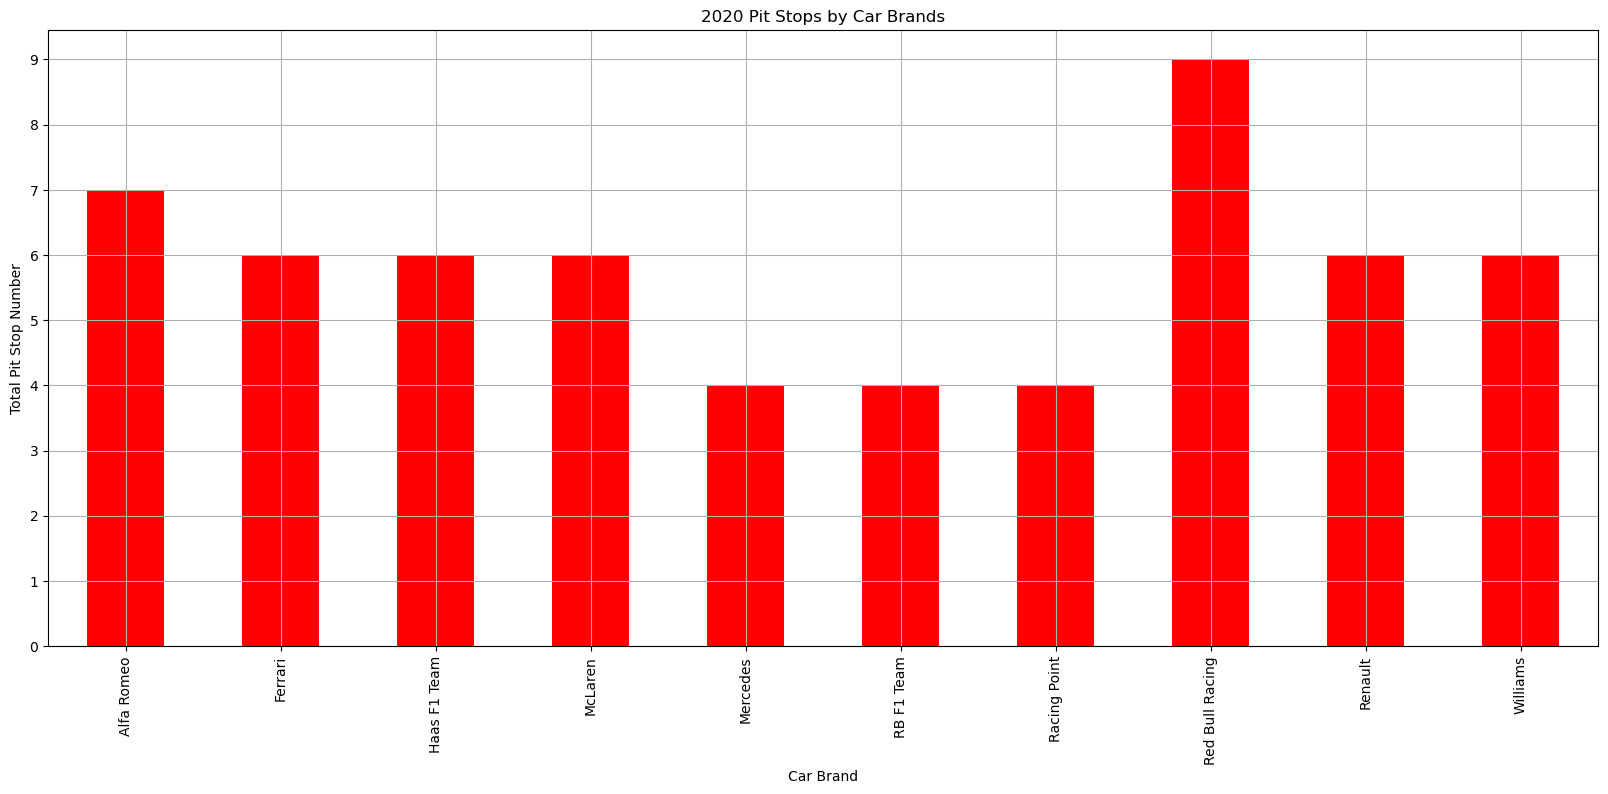

In [16]:
# pit stops by brands
brands_2020 = ['Renault', 'Ferrari', 'Mercedes', 'Alfa Romeo', 'Haas F1 Team',
               'RB F1 Team', 'Racing Point', 'Williams', 'McLaren',
               'Red Bull Racing']

total_pit_stops_2020 = pd.DataFrame()

for brand in brands_2020:
    total_pit_stops_2020 = pd.concat([total_pit_stops_2020, merged_df_2020[merged_df_2020['brand']==brand]])
    
pit_stop_counter_2020 = total_pit_stops_2020.groupby('brand')['stop'].sum()

plt.figure(figsize=(20, 8))
pit_stop_counter_2020.plot(kind='bar', color='red')
plt.xlabel('Car Brand')
plt.ylabel('Total Pit Stop Number')
plt.title('2020 Pit Stops by Car Brands')
plt.yticks(range(0, 10))
plt.grid()
plt.show()

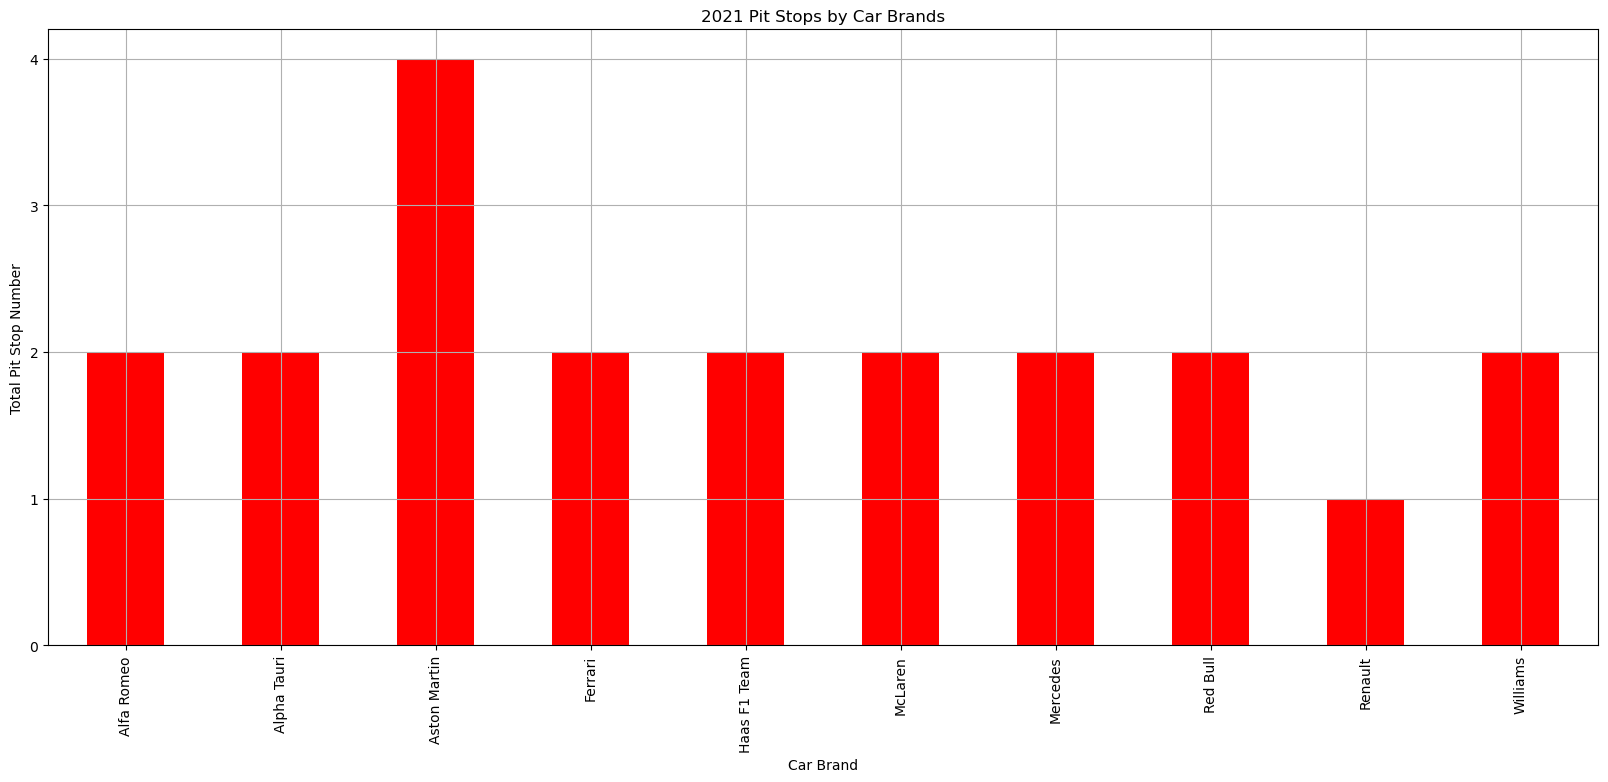

In [17]:
# pit stops by brands
brands_2021 = ['Mercedes', 'Red Bull', 'Ferrari', 'Alpha Tauri', 'McLaren',
               'Aston Martin', 'Renault', 'Alfa Romeo', 'Williams',
               'Haas F1 Team']

total_pit_stops_2021 = pd.DataFrame()

for brand in brands_2021:
    total_pit_stops_2021 = pd.concat([total_pit_stops_2021, merged_df_2021[merged_df_2021['brand']==brand]])
    
pit_stop_counter_2021 = total_pit_stops_2021.groupby('brand')['stop'].sum()

plt.figure(figsize=(20, 8))
pit_stop_counter_2021.plot(kind='bar', color='red')
plt.xlabel('Car Brand')
plt.ylabel('Total Pit Stop Number')
plt.title('2021 Pit Stops by Car Brands')
plt.yticks(range(0, 5))
plt.grid()
plt.show()

As can be seen, there is a difference between the number of pit stops between 2 years as well as analyzed. <code>Mercedes</code>, who won in both of 2 years, has reduced the number of pit stops in 2021. The biggest difference came from <code>Red Bull</code>. <code>Red Bull</code> has reduced 2 pit stops from 9 pit stops in this 1 year period. In addition to the improvement of the floor of the runway, we also observe a great improvement in <code>Red Bull</code>. This will also be reflected in <code>Red Bull's</code> ranking, which was settled in the 6th and 7th place in 2020 and settled in the 2nd and 3rd place in 2021. This is really a big development.

Thus, the entire project ended. The goal of this project was to examine two years of the Istanbul track and to make various inferences. In this respect, we observed that the track was better than 2021, after 2020. So, this project was completed.

## Thanks

So, this project has been completed here. The project has been completed by conducting a review of the Istanbul GP from 2020 to 2021. As final words, it was seen that the pit stops that decreased from 2020 to 2021 were a step towards the improvement of the track.

With my special thanks.

### Mert Kont.